## Linear Regression Model

Model
$$ Y \sim \mathcal{N}(\mu, \sigma^2)$$
$$ \mu = \alpha + \beta_1X_1 + \beta_2X_2 $$

With priors

$$ \alpha \sim \mathcal{N}(0, 100) $$
$$ \beta_i \sim \mathcal{N}(0, 100) $$
$$ \sigma \sim |\mathcal{N}(0, 1) $$

Text(0.5, 0, 'X2')

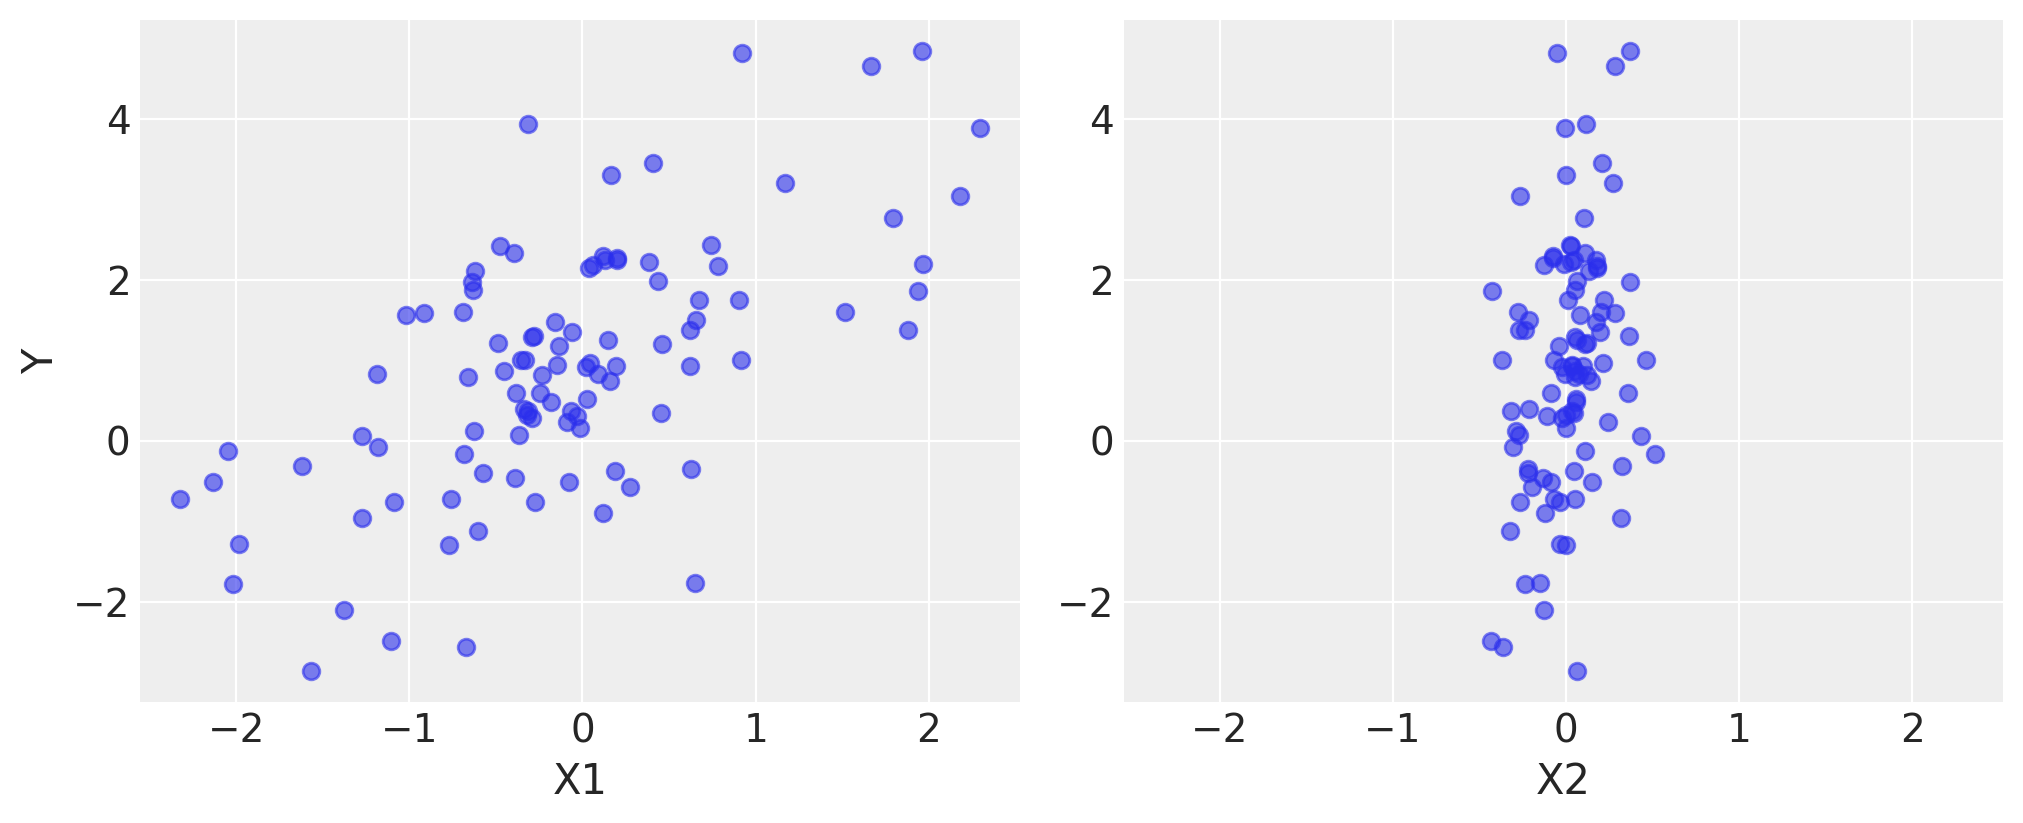

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use('arviz-darkgrid')

alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size)*sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

In [3]:
# Model Specification

import pymc3 as pm
print("Running on PyMC3 v{}".format(pm.__version__))

basic_model = pm.Model()
with basic_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

Running on PyMC3 v3.9.3


In [7]:
# Use find_MAP to find Maximum of posteriori methods

map_estimate = pm.find_MAP(model=basic_model)
map_estimate

{'alpha': array(0.95724679),
 'beta': array([1.10071814, 2.9511438 ]),
 'sigma_log__': array(0.03540151),
 'sigma': array(1.0360356)}

In [9]:
map_estimate = pm.find_MAP(model=basic_model, method='Powell')
map_estimate

{'alpha': array(0.95835519),
 'beta': array([1.1017629 , 2.95394057]),
 'sigma_log__': array(0.03638187),
 'sigma': array(1.03705179)}

In [10]:
with basic_model:
    trace = pm.sample(500, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 2 seconds.


In [14]:
trace['alpha'][-5:]

array([1.05903488, 1.00385795, 0.80612873, 0.63172449, 0.70968798])

In [15]:
# Use the step argument to choose the sampling algorithm
with basic_model:
    step = pm.Slice()
    trace = pm.sample(500, return_inferencedata=False, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 2 seconds.


/home/telescreen/miniconda3/envs/data/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n0'}>],
       [<AxesSubplot:title={'center':'beta\n1'}>,
        <AxesSubplot:title={'center':'beta\n1'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

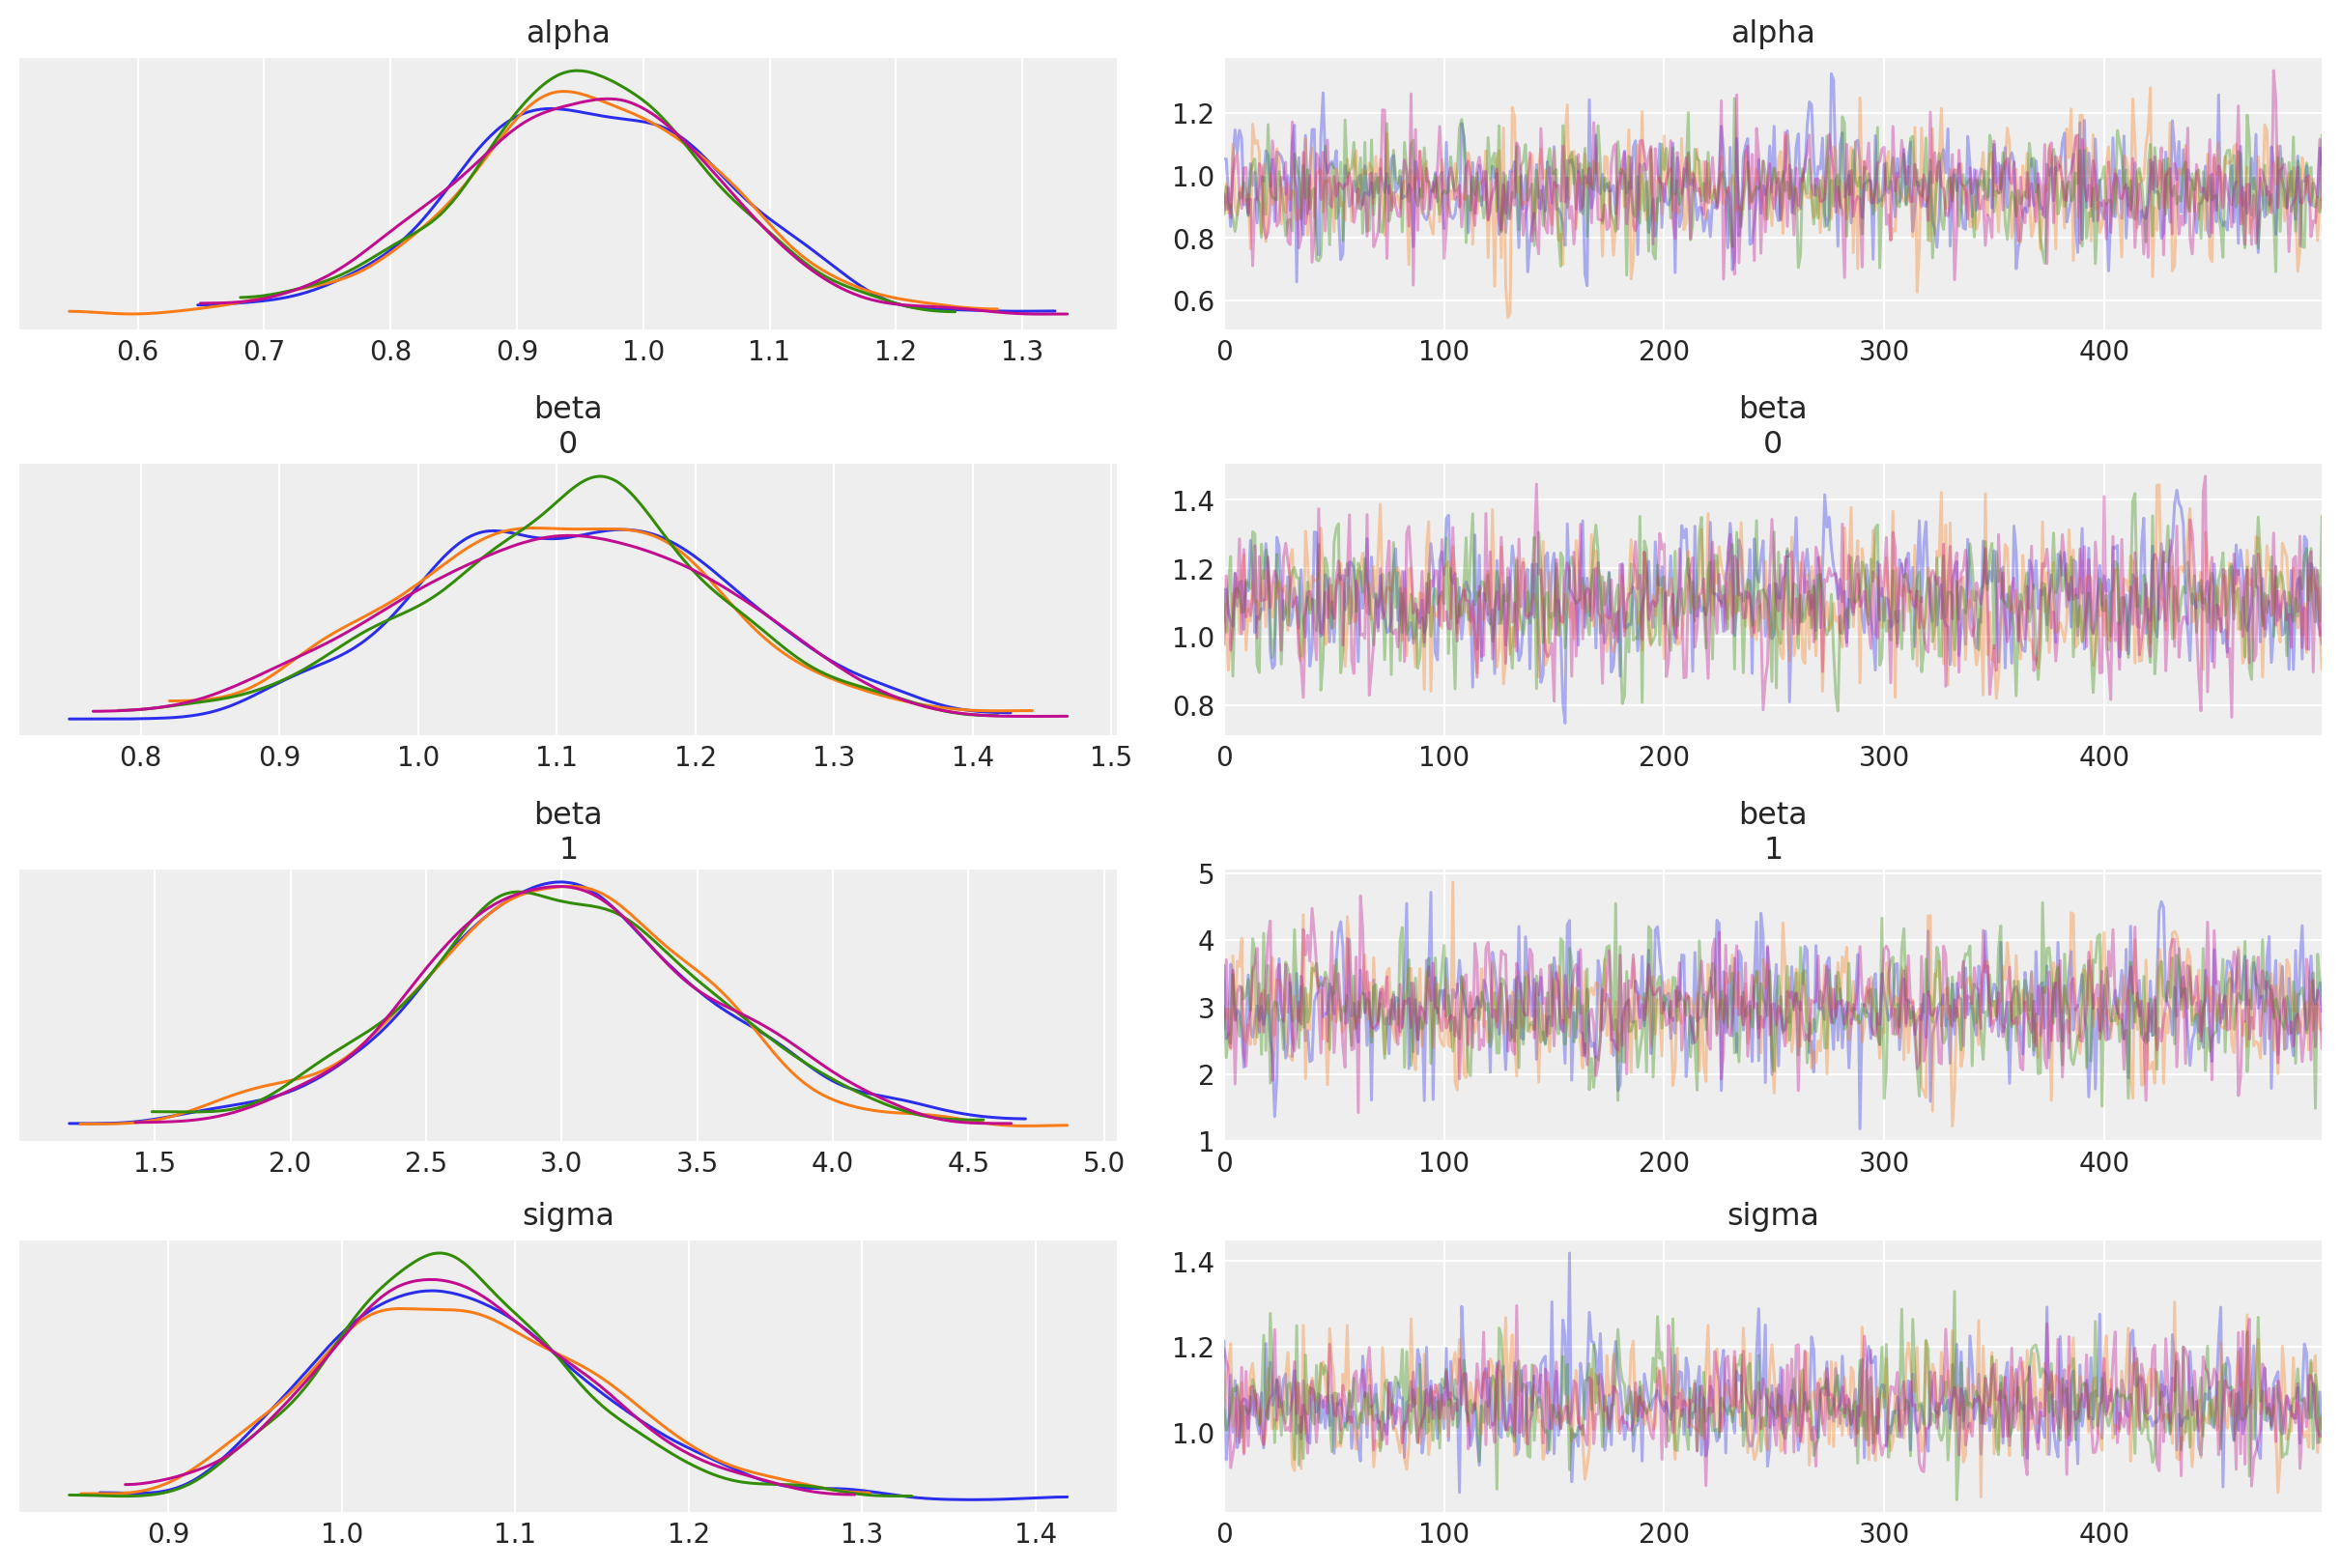

In [18]:
az.plot_trace(trace)

In [19]:
## Summary function provides a text-based output of common posterior statistics

az.summary(trace, round_to=2)

/home/telescreen/miniconda3/envs/data/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.96,0.11,0.77,1.17,0.00,0.00,2039.04,2032.75,2046.81,1525.46,1.00
beta[0],1.11,0.11,0.88,1.31,0.00,0.00,1758.09,1747.16,1754.05,1539.90,1.00
beta[1],3.00,0.54,1.95,4.03,0.01,0.01,1872.97,1807.32,1877.26,1387.16,1.00
sigma,1.07,0.07,0.93,1.21,0.00,0.00,1920.94,1903.50,1929.84,1582.22,1.01


In [20]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Dec 10 2020

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.19.0

matplotlib: 3.3.3
numpy     : 1.19.4
arviz     : 0.10.0
pymc3     : 3.9.3

Watermark: 2.1.0

